Computation Graph 

( a * b ) + c

Tensor is n-dimension structure

* Single value , n = 0
* List of values , n = 1
* Matrix of values , n = 2



Tensor types

* Constant : constant value 
* Variable : values adjusted in graph
* PlaceHolder : used to pass data into graph

In [10]:
# pip install tensorflow

|Concept|Implementation|
|---|---|
|loss measurement|mean squared error|
|optimizer to minimise loss|gradient descent optimizer|

In [12]:
import tensorflow as tf 
import numpy as np 
import math
import matplotlib.pyplot as plt 

Text(0.5, 0, 'Size')

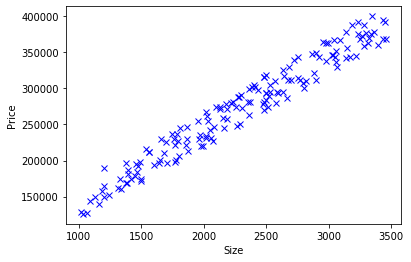

In [13]:
num_house = 160
np.random.seed(42)
house_size = np.random.randint(
    low=1000,
    high=3500,
    size=num_house
)

np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000,high=70000,size=num_house)

plt.plot(
    house_size, house_price, "bx"
)

plt.ylabel('Price')
plt.xlabel('Size')

In [27]:
# prevent under/overflows
def normalize(arr):
    return (arr - arr.mean())/arr.std()

### Train

In [15]:
num_train_samples = math.floor(num_house * 0.7)

In [26]:
train_house_size = np.asarray(house_size[:num_train_samples])

In [29]:
train_price = np.asanyarray(house_price[:num_train_samples:])

In [30]:
train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

### Test

In [31]:
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

In [32]:
test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

In [35]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [37]:
# tensorflow placeholders , get updated as we descend down the gradient 
tf_house_size = tf.placeholder('float',name="house_size")
tf_price = tf.placeholder('float',name="price")

tf_size_factor = tf.Variable(np.random.randn(),name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(),name="price_offset")

In [38]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor,tf_house_size),tf_price_offset)

In [39]:
# loss function , mean squared error 
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price,2))/(2*num_train_samples)

In [40]:
# optimise learning_rate, size of steps down the gradient
learning_rate = 0.1

# gradient descent optimizer that will minimise the loss in the loss(cost) function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [41]:
init = tf.global_variables_initializer()

In [46]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    display_every = 2
    num_training_iter = 50
    for iteration in range(num_training_iter):
#         fit all training data
        for (x,y) in zip(train_house_size_norm,train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size:x ,tf_price:y})
#         display current status
        if (iteration + 1) % display_every ==0:
            c = sess.run(tf_cost,feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
            print("iteration #:",'%04d'%(iteration + 1), "cost=", "{:.9f}".format(c),\
                  "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
    print("Optimization Finished")
    training_cost = sess.run(tf_cost,feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=",training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
        

iteration #: 0002 cost= 0.720058978 size_factor= 0.091779955 price_offset= -0.78197587
iteration #: 0004 cost= 0.488989919 size_factor= 0.2530591 price_offset= -0.6400547
iteration #: 0006 cost= 0.334198892 size_factor= 0.38506955 price_offset= -0.52387947
iteration #: 0008 cost= 0.230510592 size_factor= 0.4931228 price_offset= -0.42877954
iteration #: 0010 cost= 0.161057353 size_factor= 0.5815667 price_offset= -0.350931
iteration #: 0012 cost= 0.114538930 size_factor= 0.65396035 price_offset= -0.2872049
iteration #: 0014 cost= 0.083384469 size_factor= 0.713216 price_offset= -0.23503916
iteration #: 0016 cost= 0.062521778 size_factor= 0.76171756 price_offset= -0.19233663
iteration #: 0018 cost= 0.048552588 size_factor= 0.8014175 price_offset= -0.1573807
iteration #: 0020 cost= 0.039200630 size_factor= 0.8339127 price_offset= -0.1287661
iteration #: 0022 cost= 0.032940891 size_factor= 0.86051065 price_offset= -0.10534229
iteration #: 0024 cost= 0.028751852 size_factor= 0.882282 price_of

In [48]:
train_house_size_mean = train_house_size.mean()
train_house_size_std = train_house_size.std()
train_price_mean = train_price.mean()
train_price_std = train_price.std()

RuntimeError: Attempted to use a closed Session.

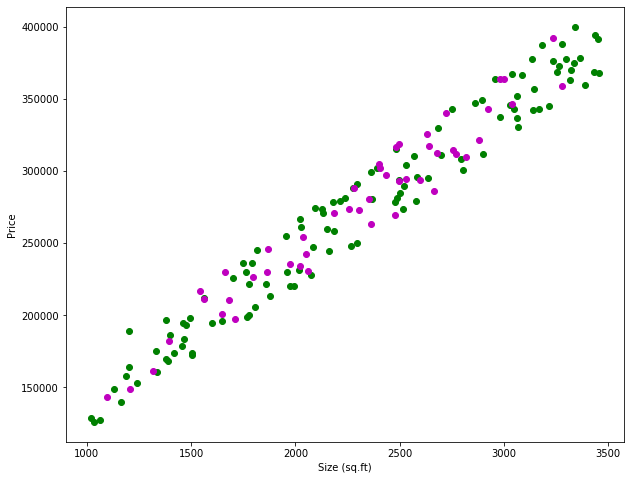

In [50]:
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.ylabel("Price")
plt.xlabel("Size (sq.ft)")
plt.plot(train_house_size,train_price,"go",label='Training data')
plt.plot(test_house_size,test_house_price,"mo",label='Testing data')
plt.plot(train_house_size * train_house_size_std + train_house_size_mean,
         (sess.run(tf_size_factor)*train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
         label='Learned Regression'
        )

plt.legend(loc='upper left')
plt.show()

# Tensor 

* An n-dimensional array or list used in Tensor to represent all data 
* Defined by properties , rank ,shape and type

### Rank
* Dimensionality of a tensor

|Rank|Description|Example|
|---|---|---|
|0|Scalar|s = 145 |
|1|Vector|v = [1,3,2,5,7]|
|2|Matrix|m = [[1,5,6],[5,3,4]]|
|3|3-Tensor (cube)| c = [ [[1,5,6],[5,3,4]] , [[9,3,5],[3,4,9]] , [[4,3,2],[3,6,7]] ]|

### Shape

* shape of data in tensor 
* related to rank

|Rank|Description|Example|Shape|
|---|---|---|---|
|0|Scalar|s = 145|[]|
|1|Vector|v = [1,3,2,5,7]|[5]|
|2|Matrix|m = [[1,5,6],[5,3,4]]|[2,3]|
|3|3-Tensor (cube)| c = [ [[1,5,6],[5,3,4]] , [[9,3,5],[3,4,9]] , [[4,3,2],[3,6,7]] ]|[3,2,3]|

### Quantitization and quantitized no.

* No. that have been scaled to fit into smaller representation
* Processed faster 
* TensorFlow Processing Units (TPUs) utilize quantitized values 

### Methods

* get_shape() - returns shape
* reshape() - changes shape
* rank - returns rank
* dtype - return data type
* cast - change data type